### Sequential Graphs

In [1]:
from typing import TypedDict, List, Literal
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    name: str
    age: str
    final: str

In [3]:
def first_node(state: AgentState) -> AgentState:
    """ This is the first node of the sequential graph """
    
    state['final'] = f"Hi {state['name']}!"

    return state

def second_node(state: AgentState) -> AgentState:
    """ This is the second node of the sequential graph """
    
    state['final'] += f" You are {state['age']} years old!"

    return state

In [ ]:
graph = StateGraph(AgentState)
graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)

# To add an edge between first node and second node
graph.add_edge("first_node", "second_node")

graph.set_entry_point("first_node")
graph.set_finish_point("second_node")

app = graph.compile()

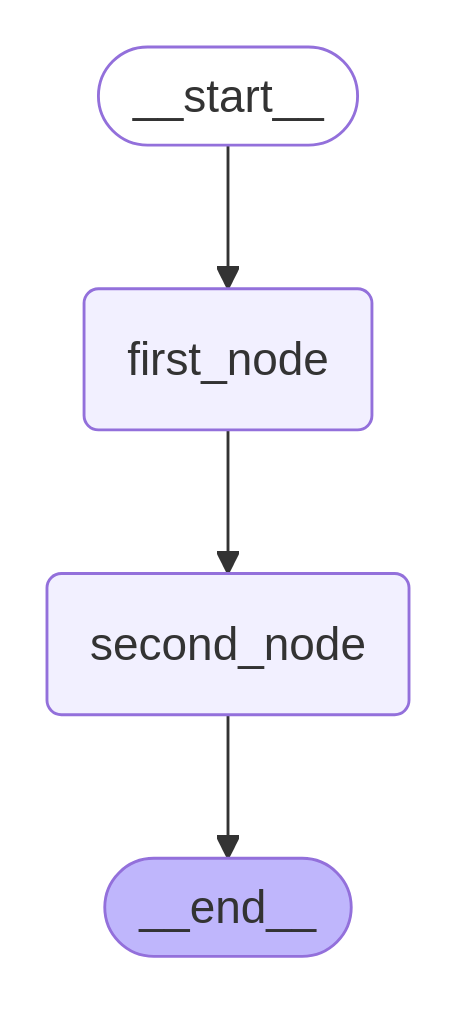

In [8]:
import nest_asyncio
nest_asyncio.apply()

from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod
display(Image(app.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.PYPPETEER)))

In [9]:
result = app.invoke({ "name": "Bob", "age": "21"})

In [10]:
print(result)

{'name': 'Bob', 'age': '21', 'final': 'Hi Bob! You are 21 years old!'}


#### Graph - Exercise 3

In [21]:
class ASE3(TypedDict):
    name: str
    age: str
    skills: List[str]
    final: str

In [22]:
def first_node(state: ASE3) -> ASE3:
    """ Personalize the name field with a greeting """
    state['final'] = f"Hi {state['name']}, welcome to the system! "
    return state

def second_node(state: ASE3) -> ASE3:
    """ Describe the user age """
    state['final'] += f"You are {state['age']} year old. "
    return state

def third_node(state: ASE3) -> ASE3:
    """ List user skills in a formatted string """
    state['final'] += f"These are your skills: {', '.join(state['skills']) if len(state['skills']) > 0 else ' None'}"
    return state

In [23]:
graph = StateGraph(ASE3)
graph.add_node("first_node",first_node)
graph.add_node("second_node",second_node)
graph.add_node("third_node",third_node)
graph.add_edge("first_node", "second_node")
graph.add_edge("second_node", "third_node")
graph.set_entry_point("first_node")
graph.set_finish_point("third_node")

app = graph.compile()

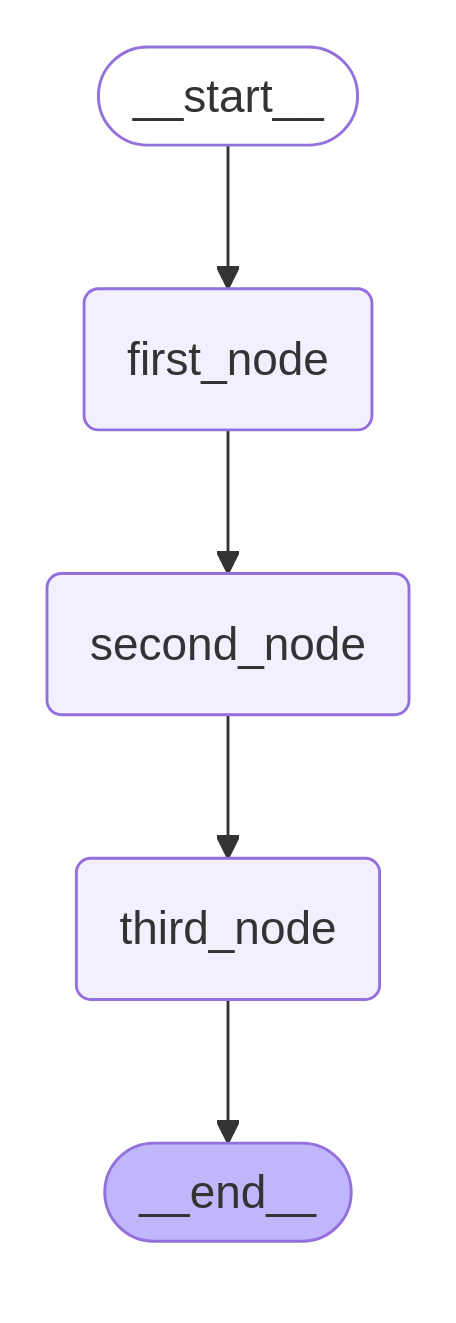

In [24]:
import nest_asyncio
nest_asyncio.apply()

from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod
display(Image(app.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.PYPPETEER)))

In [27]:
result1 = app.invoke({"name": "Linda", "age": "31", "skills": []})
result2 = app.invoke({"name": "Linda", "age": "31", "skills": ["Python", "LangGraph", "JavaScript"]})

In [28]:
result1

{'name': 'Linda',
 'age': '31',
 'skills': [],
 'final': 'Hi Linda, welcome to the system! You are 31 year old. These are your skills:  None'}

In [29]:
result2

{'name': 'Linda',
 'age': '31',
 'skills': ['Python', 'LangGraph', 'JavaScript'],
 'final': 'Hi Linda, welcome to the system! You are 31 year old. These are your skills: Python, LangGraph, JavaScript'}